In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('fifa21_raw_data.csv')
pd.set_option('display.max_columns', None)

C:\Users\HP EliteBook\AppData\Local\Temp\ipykernel_18576\1754968665.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('fifa21_raw_data.csv')


In [3]:
df.head()

,photoUrl,LongName,playerUrl,Nationality,Positions,Name,Age,↓OVA,POT,Team & Contract,ID,Height,Weight,foot,BOV,BP,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,L. Messi,33,93,93,\n\n\n\nFC Barcelona\n2004 ~ 2021\n\n,158023,"5'7""",159lbs,Left,93,RW,0,"Jul 1, 2004",NaN,€67.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,Cristiano Ronaldo,35,92,92,\n\n\n\nJuventus\n2018 ~ 2022\n\n,20801,"6'2""",183lbs,Right,92,ST,0,"Jul 10, 2018",NaN,€46M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,J. Oblak,27,91,93,\n\n\n\nAtlético Madrid\n2014 ~ 2023\n\n,200389,"6'2""",192lbs,Right,91,GK,2,"Jul 16, 2014",NaN,€75M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,K. De Bruyne,29,91,91,\n\n\n\nManchester City\n2015 ~ 2023\n\n,192985,"5'11""",154lbs,Right,91,CAM,0,"Aug 30, 2015",NaN,€87M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,Neymar Jr,28,91,91,\n\n\n\nParis Saint-Germain\n2017 ~ 2022\n\n,190871,"5'9""",150lbs,Right,91,LW,0,"Aug 3, 2017",NaN,€90M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,\n273


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

In [5]:
# split column to seperate Team and Contract
df['club'] = df['Team & Contract'].str.split(r"\n\n\n\n|\n|~", expand = True)[1]
df['contract'] = df['Team & Contract'].str.split(r"\n\n\n\n|\n|~", expand = True)[2] + '-' + df['Team & Contract'].str.split(r"\n\n\n\n|\n|~", expand = True)[3]

In [6]:
# Split height column to feet and inches 
df['feet'] = df['Height'].str.split(r"'|\"", expand=True)[0]
df['inches'] = df['Height'].str.split(r"'|\"", expand=True)[1]

In [7]:
# change datatype to integer to allow calculations
df = df.astype({'feet':'int', 'inches': 'int'})

In [8]:
# convert feets to inches and add to the inches column to form a unique height column that could be used in calculations
df['height'] = (df['feet'] * 12) + df['inches']

In [9]:
# extract integer from the weight column
df['weight'] = df['Weight'].str.split(pat = 'l', expand= True)[0]

# change datatype to integer
df = df.astype({'weight' : 'int'})

In [10]:
# remove currency sign from column
df['wage'] = df['Wage'].str.split(pat = '€', expand = True )[1]

In [11]:
# Create a function that convert k,m to interger
def convert_values(x):
    if isinstance(x, str) and 'K' in x:
        return int(float(x.replace('K', '')) * 1000)
    elif isinstance(x, str) and 'M' in x:
        return int(float(x.replace('M', '')) * 1000000)
    else:
        return int(x)

In [12]:
# convert wage column to intergers
df['wage'] = df['wage'].apply(convert_values)

In [13]:
# remove currency sign from column
df['value'] = df['Value'].str.split(pat = '€', expand = True )[1]

In [14]:
# convert value column to intergers
df['value'] = df['value'].apply(convert_values)

In [15]:
# remove currency sign from column
df['release_clause'] = df['Release Clause'].str.split(pat = '€', expand = True )[1]

In [16]:
# convert release_clause column to intergers
df['release_clause'] = df['release_clause'].apply(convert_values)

In [17]:
# remove start from the following columns: W/F, SM and IR
df['W/F'] = df['W/F'].str.split(pat = '★', expand= True)[0]
df['SM'] = df['SM'].str.split(pat = '★', expand= True)[0]
df['IR'] = df['IR'].str.split(pat = '★', expand= True)[0]

In [18]:
# rename some columnns to make it easier to understand what it stands for
df = df.rename(columns ={'LongName': 'full_name', '↓OVA':'overall_rating', 'Foot':'Strong_foot','POT': 'player_potential', 'BOV': 'best_overall', 'BP':'best_position', 'Attacking' : 'total_attacking_attribute', 'Heading Accuracy' : 'heading_accuracy', 'Short Passing' : 'short_passing' , 'Skill' : 'total_skill' , 'FK Accuracy': 'freekick_accuracy','Long Passing' : 'long_passing', 'Ball Control': 'ball_control', 'Sprint Speed': 'sprint_speed', 'Power': 'total_power', 'Shot Power': 'shot_power', 'Long Shots': 'long_shots', 'Movement': 'total_movement', 'Mentality' :'total_mentality', 'Defending': 'total_defending', 'Standing Tackle': 'standing_tackle', 'Sliding Tackle': 'sliding_tackle', 'Goalkeeping': 'total_goalkeeping', 
   'GK Diving':'diving', 'GK Handling': 'handling', 'GK Kicking': 'Kicking', 'GK Positioning': 'gk_positioning', 'GK Reflexes': 'gk_reflexes', 'Total Stats': 'total_stats', 'Base Stats' : 'base_stats', 'A/W':'attacking_workrate', 'D/W':'defensive_workrate', 'PAC': 'pace', 'SHO':'shooting', 'PAS': 'passing', 'DRI': 'total_dribbling', 'DEF':'total_defence', 'PHY':'total_physical'})

In [19]:
# drop some irrelevant columns
df = df.drop(['photoUrl','playerUrl','Team & Contract', 'Height', 'Weight', 'Value', 'Wage', 'Release Clause','Loan Date End','Hits'], axis = 1)

In [20]:
# convert all column name to lower case
df = df.rename(columns = str.lower)

In [21]:
# check which row is duplicated
df[df.duplicated() == 1]

,full_name,nationality,positions,name,age,overall_rating,player_potential,id,foot,best_overall,best_position,growth,joined,total_attacking_attribute,crossing,finishing,heading_accuracy,short_passing,volleys,total_skill,dribbling,curve,freekick_accuracy,long_passing,ball_control,total_movement,acceleration,sprint_speed,agility,reactions,balance,total_power,shot_power,jumping,stamina,strength,long_shots,total_mentality,aggression,interceptions,positioning,vision,penalties,composure,total_defending,marking,standing_tackle,sliding_tackle,total_goalkeeping,diving,handling,kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,attacking_workrate,defensive_workrate,ir,pace,shooting,passing,total_dribbling,total_defence,total_physical,club,contract,feet,inches,height,weight,wage,value,release_clause
944,Kevin Berlaso,Ecuador,RB,K. Berlaso,32,77,77,251698,Right,77,RB,0,"Jan 1, 2010",306,72,47,60,73,54,350,75,75,54,68,78,397,77,78,86,77,79,345,69,70,86,57,63,323,73,70,69,63,48,73,224,71,75,78,58,11,12,11,16,8,2003,420,3,4,High,Medium,2,78,56,69,77,72,68,Ecuador,Free-,5,8,68,152,0,0,0


In [22]:
# drop duplicate rows
df.drop_duplicates(inplace = True)

In [23]:
#Overview of cleaned table
df.head()

,full_name,nationality,positions,name,age,overall_rating,player_potential,id,foot,best_overall,best_position,growth,joined,total_attacking_attribute,crossing,finishing,heading_accuracy,short_passing,volleys,total_skill,dribbling,curve,freekick_accuracy,long_passing,ball_control,total_movement,acceleration,sprint_speed,agility,reactions,balance,total_power,shot_power,jumping,stamina,strength,long_shots,total_mentality,aggression,interceptions,positioning,vision,penalties,composure,total_defending,marking,standing_tackle,sliding_tackle,total_goalkeeping,diving,handling,kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,attacking_workrate,defensive_workrate,ir,pace,shooting,passing,total_dribbling,total_defence,total_physical,club,contract,feet,inches,height,weight,wage,value,release_clause
0,Lionel Messi,Argentina,RW ST CF,L. Messi,33,93,93,158023,Left,93,RW,0,"Jul 1, 2004",429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,FC Barcelona,2004 - 2021,5,7,67,159,560000,67500000,138400000
1,C. Ronaldo dos Santos Aveiro,Portugal,ST LW,Cristiano Ronaldo,35,92,92,20801,Right,92,ST,0,"Jul 10, 2018",437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,Juventus,2018 - 2022,6,2,74,183,220000,46000000,75900000
2,Jan Oblak,Slovenia,GK,J. Oblak,27,91,93,200389,Right,91,GK,2,"Jul 16, 2014",95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,Atlético Madrid,2014 - 2023,6,2,74,192,125000,75000000,159400000
3,Kevin De Bruyne,Belgium,CAM CM,K. De Bruyne,29,91,91,192985,Right,91,CAM,0,"Aug 30, 2015",407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,Manchester City,2015 - 2023,5,11,71,154,370000,87000000,161000000
4,Neymar da Silva Santos Jr.,Brazil,LW CAM,Neymar Jr,28,91,91,190871,Right,91,LW,0,"Aug 3, 2017",408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,Paris Saint-Germain,2017 - 2022,5,9,69,150,270000,90000000,166500000


After cleaning, we can now use the dataset for analysis.                            

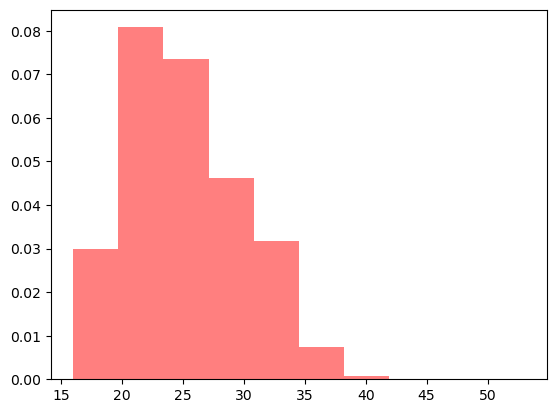

In [24]:
plt.hist(df['age'], density = True, color = 'red', alpha = 0.5, bins = 10)

plt.show()

1. Team with maximum number of players

In [25]:
#Team with maximum number of players

team_age = df[['club', 'age']].groupby('club', as_index = False).agg(total_player=('age','count'), avg_age = ('age', 'mean'))
# approximate the ave_rate to the nearest number
team_age['avg_age'] = round(team_age['avg_age'])

team_age[['club', 'total_player']][team_age['total_player'] == team_age['total_player'].max()]

,club,total_player
53,AS Saint-Étienne,33
84,Angers SCO,33
88,Arsenal,33
125,Borussia Mönchengladbach,33
131,Brighton & Hove Albion,33
136,Burnley,33
140,CA Osasuna,33
151,Cagliari,33
164,Chelsea,33
205,Crystal Palace,33


2. Which team has the fewest players?

In [26]:
team_age[['club']][team_age['total_player'] == team_age['total_player'].min()]

,club
6,Chile
7,China PR
8,Colombia
12,Greece
17,Mexico
23,Poland
32,Wales


3. Which club has the youngest average age?

In [27]:
team_age[['club','avg_age']][team_age['avg_age'] == team_age['avg_age'].min()]

,club,avg_age
111,Bayern München II,21.0
271,FC Nordsjælland,21.0
295,Famalicão,21.0
544,SC Heerenveen,21.0


4. Which club has the oldest average age?

In [28]:
team_age[['club','avg_age']][team_age['avg_age'] == team_age['avg_age'].max()]

,club,avg_age
32,Wales,35.0


5. Who is the most valuable player?

In [29]:
df[['name', 'value']][df['value'] == df['value'].max()]

,name,value
6,K. Mbappé,105500000


6. Which players are underpaid relative to their value?

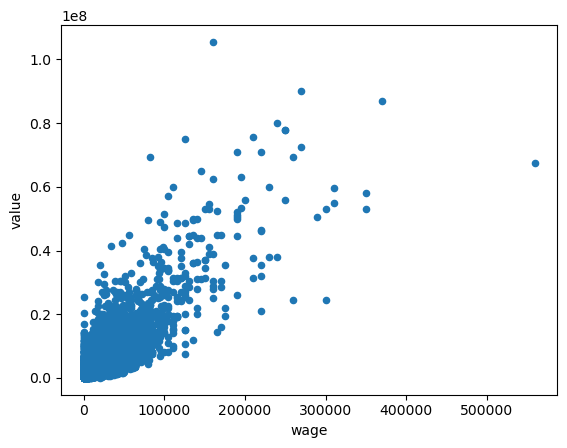

In [30]:
underpaid_players = df[['name','value','wage']].sort_values('value', ascending = False)

underpaid_players.plot.scatter(x = 'wage', y = 'value')

plt.show()

A player is considered underpaid if Their value is in the top 10% of all player values and Their wage is in the bottom 10% of all player wages

In [31]:
# top 10% value
high_value = underpaid_players['value'].quantile(0.90)

# least 10% wages
low_wage= underpaid_players['wage'].quantile(0.10)  


List of underpaid players

In [32]:
underpaid_players[['name', 'value', 'wage']][(underpaid_players['value'] >= high_value) & (underpaid_players['wage'] <= low_wage)]

,name,value,wage
156,Pau López,25500000,500
378,V. Tsygankov,20500000,500
548,L. Pellegrini,17000000,500
379,D. Livaković,14500000,500
336,Ismaily,14000000,500
...,...,...,...
3428,S. Rodríguez,6000000,500
3313,Marcos Antonio,6000000,500
2336,D. Hovorka,6000000,500
2935,O. Dorley,6000000,500


7. What’s the relationship between `overall_rating`, `value`, and `wage`? 

In [33]:
df[['overall_rating', 'value', 'wage']].corr()

,overall_rating,value,wage
overall_rating,1.000000,0.631628,0.584363
value,0.631628,1.000000,0.848036
wage,0.584363,0.848036,1.000000


8. Which nation has the most "best players" (rating ≥ 80)? 

In [34]:
nation = df[['nationality', 'name']][df['overall_rating'] > 80].groupby(['nationality'], as_index = False).agg(players = ('name', 'count') )
nation[['nationality','players']][nation['players'] == nation['players'].max()]

,nationality,players
44,Spain,55


In [35]:
nation[['nationality', 'players']].sort_values('players', ascending = False).head(5)

,nationality,players
44,Spain,55
6,Brazil,47
18,France,37
20,Germany,32
2,Argentina,21


In [36]:
position_wage = df[['best_position', 'wage']].groupby(['best_position'], as_index = False).agg(avg_wage =('wage','mean'))
position_wage

,best_position,avg_wage
0,CAM,9024.597651
1,CB,8184.708277
2,CDM,9562.525952
3,CF,23444.871795
4,CM,12953.820439
5,GK,6390.819277
6,LB,8552.117864
7,LM,8574.971297
8,LW,16202.150538
9,LWB,8256.130268


9. Which position earns the highest wages?

In [37]:
# Which position earns the highest wages?
position_wage[['best_position', 'avg_wage']][position_wage['avg_wage'] == position_wage['avg_wage'].max()]

,best_position,avg_wage
3,CF,23444.871795


10. Which position earns the lowest wages?

In [38]:
# Which position earns the lowest wages?
position_wage[['best_position', 'avg_wage']][position_wage['avg_wage'] == position_wage['avg_wage'].min()]

,best_position,avg_wage
5,GK,6390.819277


11. What attributes have high correclation with overall rating for each position's top players?

In [39]:
df[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][df['overall_rating'] >= 80].corr()

# We try to find if there are specific attributes with strong correlation independent of position

,overall_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,total_defending,marking,standing_tackle,sliding_tackle,diving,handling,kicking,gk_positioning,gk_reflexes,pace,shooting,passing
overall_rating,1.000000,0.011499,0.071026,0.003576,0.095939,0.055801,0.033744,0.048432,0.062876,0.106316,0.064760,0.062345,0.081115,0.101110,0.716585,0.050994,0.116678,0.094586,0.057977,0.094586,0.057977,0.026787,0.050620,-0.050577,-0.041480,0.043361,0.180180,0.076565,0.298421,-0.050985,-0.029053,-0.049741,-0.070341,0.066818,0.064392,0.062774,0.067874,0.062387,0.158880,0.228110,0.300207
crossing,0.011499,1.000000,0.808752,0.572006,0.877921,0.812023,0.918992,0.928068,0.823990,0.799783,0.900421,0.705045,0.646607,0.725105,0.209315,0.748678,0.663556,-0.142901,0.817337,-0.142901,0.817337,-0.174514,0.858608,0.522705,0.434258,0.889366,0.770025,0.748109,0.706681,0.451201,0.467277,0.455845,0.413363,-0.840779,-0.842322,-0.835873,-0.845431,-0.842366,-0.054086,0.002218,0.352368
finishing,0.071026,0.808752,1.000000,0.567854,0.786481,0.946888,0.891068,0.877753,0.829512,0.627762,0.857825,0.671289,0.619317,0.711713,0.302571,0.675750,0.810137,-0.116011,0.701015,-0.116011,0.701015,-0.071573,0.928964,0.410187,0.128495,0.955807,0.749969,0.880741,0.726774,0.144022,0.185221,0.152551,0.091694,-0.774449,-0.771890,-0.769193,-0.773563,-0.773215,-0.016093,0.353715,0.236679
heading_accuracy,0.003576,0.572006,0.567854,1.000000,0.722666,0.563828,0.652861,0.561574,0.482540,0.612660,0.720998,0.359954,0.476953,0.228915,0.250962,0.223505,0.464236,0.371361,0.707827,0.371361,0.707827,0.455839,0.587478,0.803843,0.601274,0.605545,0.285332,0.586731,0.628348,0.643807,0.665233,0.633869,0.607783,-0.824970,-0.820904,-0.815847,-0.817156,-0.824285,-0.370395,-0.370044,-0.334758
short_passing,0.095939,0.877921,0.786481,0.722666,1.000000,0.792431,0.922363,0.861554,0.793466,0.911645,0.961503,0.611784,0.593136,0.627947,0.296931,0.648180,0.637898,-0.054033,0.847181,-0.054033,0.847181,0.008450,0.844352,0.672436,0.580259,0.840811,0.718488,0.767509,0.814711,0.596684,0.625573,0.597503,0.544948,-0.923294,-0.922313,-0.913029,-0.922663,-0.923851,-0.260465,-0.156291,0.179047
volleys,0.055801,0.812023,0.946888,0.563828,0.792431,1.000000,0.876651,0.879096,0.848420,0.644912,0.854079,0.632619,0.570278,0.688418,0.278195,0.672450,0.815759,-0.115058,0.673059,-0.115058,0.673059,-0.092756,0.927158,0.404665,0.160934,0.925580,0.752718,0.885298,0.737107,0.169542,0.209931,0.176288,0.118703,-0.773534,-0.770400,-0.767327,-0.772805,-0.772906,-0.071835,0.317979,0.258599
dribbling,0.033744,0.918992,0.891068,0.652861,0.922363,0.876651,1.000000,0.924507,0.829979,0.797510,0.970175,0.752238,0.705849,0.763425,0.246916,0.753665,0.705600,-0.112043,0.831185,-0.112043,0.831185,-0.094296,0.908453,0.578404,0.407384,0.936950,0.764997,0.822683,0.795100,0.428487,0.456794,0.431137,0.382314,-0.916481,-0.916245,-0.909290,-0.915434,-0.917028,-0.067878,0.001898,0.187863
curve,0.048432,0.928068,0.877753,0.561574,0.861554,0.879096,0.924507,1.000000,0.884771,0.772460,0.904303,0.681516,0.607439,0.739092,0.239769,0.747085,0.751432,-0.157758,0.765108,-0.157758,0.765108,-0.164874,0.916200,0.482413,0.339538,0.916822,0.793676,0.826770,0.748569,0.352742,0.378057,0.361780,0.306017,-0.825274,-0.824928,-0.821380,-0.831434,-0.827358,-0.079102,0.138230,0.351186
freekick_accuracy,0.062876,0.823990,0.829512,0.482540,0.793466,0.848420,0.829979,0.884771,1.000000,0.740588,0.828670,0.574520,0.481411,0.658917,0.225839,0.673741,0.771498,-0.207522,0.668113,-0.207522,0.668113,-0.160968,0.895602,0.411683,0.278246,0.830421,0.746819,0.828744,0.698584,0.282651,0.311292,0.296492,0.230919,-0.743635,-0.742037,-0.739957,-0.748841,-0.745619,-0.146004,0.211634,0.376046
long_passing,0.106316,0.799783,0.627762,0.612660,0.911

In [40]:
best_player_attribute = df[['overall_rating','best_position', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][df['overall_rating'] >= 80]

In [41]:
#create table that show all attributes, overall_rating and best positions of each players with overall_rating of 80 and above
best_player_attribute

,overall_rating,best_position,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,total_defending,marking,standing_tackle,sliding_tackle,diving,handling,kicking,gk_positioning,gk_reflexes,pace,shooting,passing
0,93,RW,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,68,72,69,94,44,40,93,95,75,96,91,32,35,24,6,11,15,14,8,85,92,91
1,92,ST,84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,95,84,78,93,63,29,95,82,84,95,84,28,32,24,7,11,15,14,11,89,93,81
2,91,GK,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,41,78,12,34,19,11,65,11,68,57,27,12,18,87,92,78,90,90,87,92,78
3,91,CAM,94,82,55,94,82,88,85,83,93,92,77,76,78,91,76,91,63,89,63,89,74,91,76,66,88,94,84,91,186,68,65,53,15,13,5,10,13,76,86,93
4,91,LW,85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,62,81,50,84,51,36,87,90,92,93,94,35,30,29,9,9,15,15,11,91,85,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,80,GK,19,13,18,23,10,15,19,13,22,22,51,50,53,71,45,59,62,35,62,35,72,13,24,17,11,59,10,67,44,18,13,13,77,72,78,82,84,77,72,78
502,80,LW,80,70,62,80,75,86,86,80,77,86,78,67,85,77,78,85,35,66,35,66,65,83,79,31,79,76,70,84,95,53,22,20,5,10,13,6,6,72,76,79
503,80,CDM,86,62,66,84,76,77,81,75,81,80,62,54,70,84,73,82,62,87,62,87,70,70,85,79,72,79,89,86,236,77,80,79,12,9,10,8,6,58,70,82
504,80,CAM,84,81,63,83,68,83,86,77,82,81,67,71,68,83,70,80,31,51,31,51,64,78,55,35,82,84,75,81,127,41,47,39,9,14,6,10,11,69,79,83


In [42]:
st_attributes =  best_player_attribute[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][best_player_attribute['best_position']== 'ST'].corr() 

st_attributes[['overall_rating']][st_attributes['overall_rating'] > 0.7]


,overall_rating
overall_rating,1.000000
finishing,0.830144
ball_control,0.743093
reactions,0.875199
positioning,0.823611
composure,0.778759
shooting,0.826006


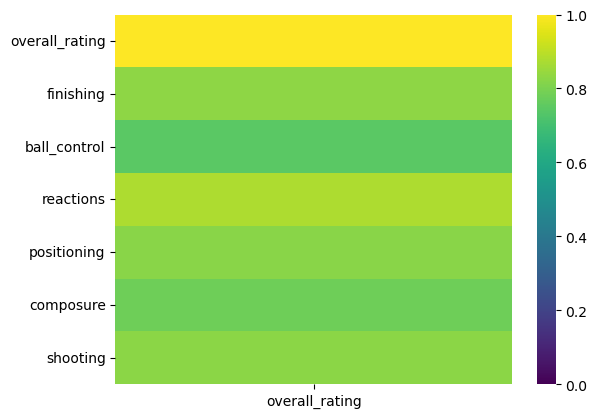

In [43]:
sns.heatmap(st_attributes[['overall_rating']][st_attributes['overall_rating'] > 0.7], vmin = 0, cmap = 'viridis')

plt.show()

In [44]:
rw_attributes = best_player_attribute[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][best_player_attribute['best_position']== 'RW'].corr()
rw_attributes[['overall_rating']][rw_attributes['overall_rating'] > 0.7]

,overall_rating
overall_rating,1.000000
finishing,0.798253
short_passing,0.833052
dribbling,0.735053
ball_control,0.860160
reactions,0.897177
long_shots,0.700293
positioning,0.913819
vision,0.862447
composure,0.909868


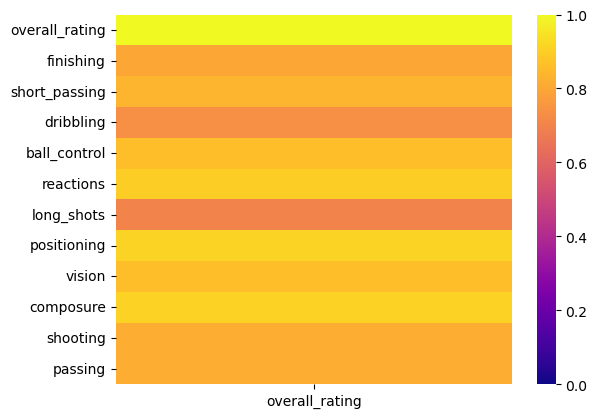

In [45]:
sns.heatmap(rw_attributes[['overall_rating']][rw_attributes['overall_rating'] > 0.7], vmin = 0, cmap = 'plasma')

plt.show()

In [46]:
lw_attributes = best_player_attribute[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][best_player_attribute['best_position']== 'LW'].corr()
lw_attributes[['overall_rating']][lw_attributes['overall_rating'] > 0.7]

,overall_rating
overall_rating,1.000000
finishing,0.845008
short_passing,0.833187
dribbling,0.943079
ball_control,0.771349
acceleration,0.842798
sprint_speed,0.872152
agility,0.753612
reactions,0.929986
positioning,0.813859


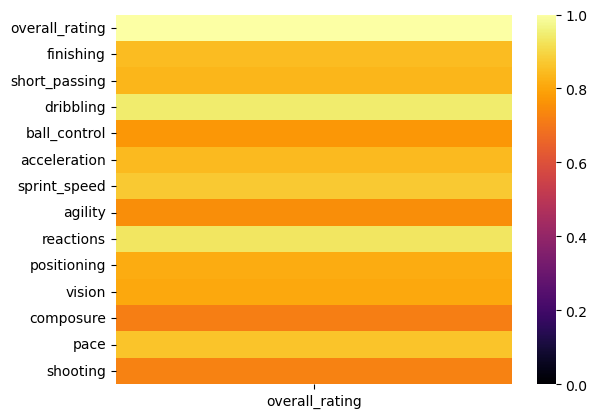

In [47]:
sns.heatmap(lw_attributes[['overall_rating']][lw_attributes['overall_rating'] > 0.7], vmin = 0, cmap = 'inferno')

plt.show()

In [48]:
cf_attributes = best_player_attribute[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][best_player_attribute['best_position']== 'CF'].corr()
cf_attributes[['overall_rating']][cf_attributes['overall_rating'] > 0.7]

,overall_rating
overall_rating,1.000000
short_passing,0.816227
dribbling,0.870156
ball_control,0.945657
reactions,0.891681
vision,0.809087
composure,0.863791


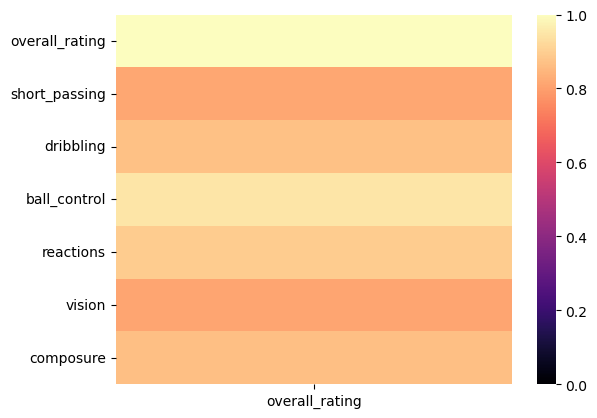

In [49]:
sns.heatmap(cf_attributes[['overall_rating']][cf_attributes['overall_rating'] > 0.7], vmin = 0, cmap = 'magma')

plt.show()

In [50]:
cam_attributes = best_player_attribute[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][best_player_attribute['best_position']== 'CAM'].corr()
cam_attributes[['overall_rating']][cam_attributes['overall_rating'] > 0.5]

,overall_rating
overall_rating,1.000000
crossing,0.565212
short_passing,0.666118
volleys,0.508671
ball_control,0.601793
reactions,0.624441
positioning,0.573316
vision,0.630312
shooting,0.525694
passing,0.657711


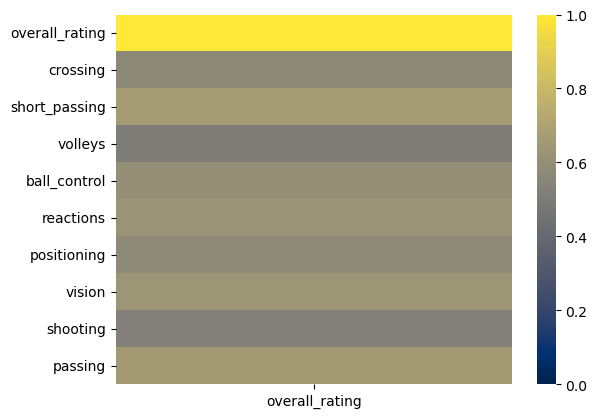

In [51]:
sns.heatmap(cam_attributes[['overall_rating']][cam_attributes['overall_rating'] > 0.5], vmin = 0, cmap = 'cividis')

plt.show()

In [52]:
cm_attributes = best_player_attribute[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][best_player_attribute['best_position']== 'CM'].corr()
cm_attributes[['overall_rating']][cm_attributes['overall_rating'] > 0.7]

,overall_rating
overall_rating,1.000000
short_passing,0.759896
long_passing,0.732483
reactions,0.713536
vision,0.703801


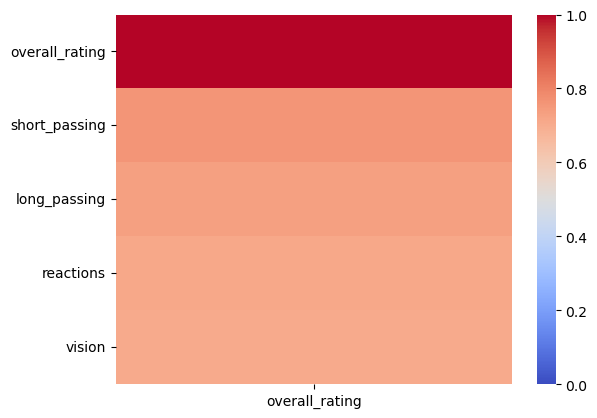

In [53]:
sns.heatmap(cm_attributes[['overall_rating']][cm_attributes['overall_rating'] > 0.7], vmin = 0, cmap = 'coolwarm')

plt.show()

In [54]:
cdm_attributes = best_player_attribute[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][best_player_attribute['best_position']== 'CDM'].corr()
cdm_attributes = cdm_attributes[['overall_rating']][cdm_attributes['overall_rating'] > 0.6]

cdm_attributes


,overall_rating
overall_rating,1.000000
short_passing,0.618218
reactions,0.632359
interceptions,0.685264
total_defending,0.648005
marking,0.663107


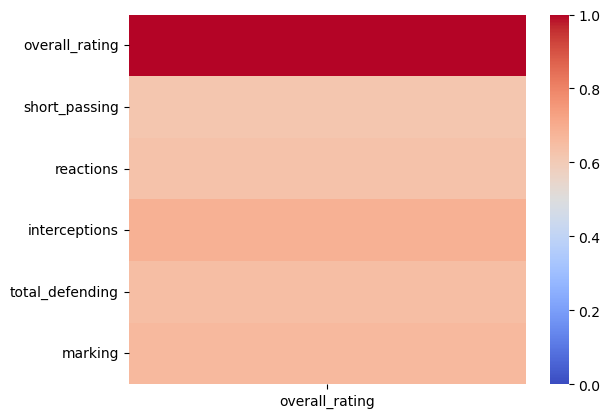

In [55]:
sns.heatmap(cdm_attributes[['overall_rating']][cdm_attributes['overall_rating'] > 0.6], vmin = 0, cmap = 'coolwarm')

plt.show()

In [56]:
lm_attributes = best_player_attribute[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][best_player_attribute['best_position']== 'LM'].corr()
lm_attributes[['overall_rating']][lm_attributes['overall_rating'] > 0.5]

,overall_rating
overall_rating,1.000000
ball_control,0.647992
positioning,0.533616
vision,0.543767
composure,0.546007
shooting,0.532760


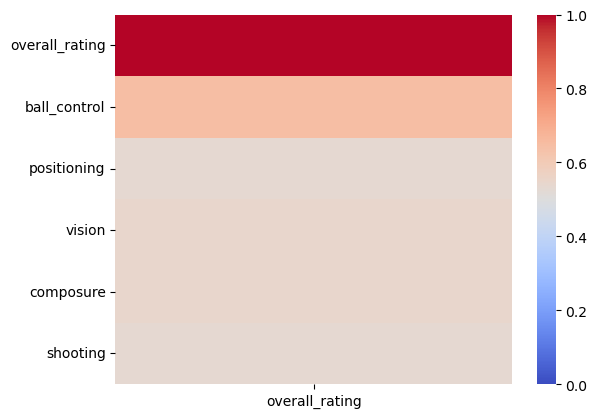

In [57]:
sns.heatmap(lm_attributes[['overall_rating']][lm_attributes['overall_rating'] > 0.5], vmin = 0, cmap = 'coolwarm')

plt.show()

In [58]:
rm_attributes = best_player_attribute[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][best_player_attribute['best_position']== 'RM'].corr()
rm_attributes[['overall_rating']][rm_attributes['overall_rating'] > 0.6]

,overall_rating
overall_rating,1.000000
reactions,0.857831
positioning,0.654995


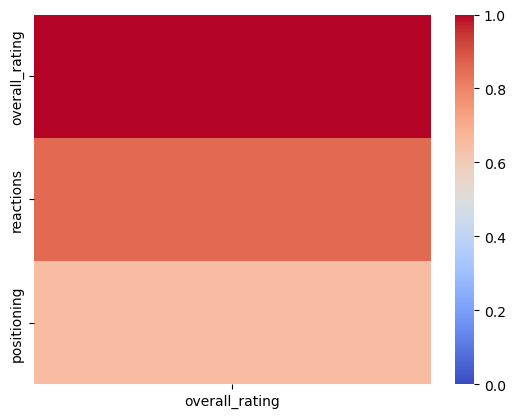

In [59]:
sns.heatmap(rm_attributes[['overall_rating']][rm_attributes['overall_rating'] > 0.6], vmin = 0, cmap = 'coolwarm')

plt.show()

In [60]:
lwb_attributes = best_player_attribute[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][best_player_attribute['best_position']== 'LWB'].corr()
lwb_attributes[['overall_rating']][lwb_attributes['overall_rating'] > 0.7]

,overall_rating
overall_rating,1.000000
dribbling,0.860309
curve,0.762094
long_passing,0.895130
ball_control,0.845017
agility,0.724310
reactions,0.733869
interceptions,0.719708
positioning,0.767244
passing,0.726722


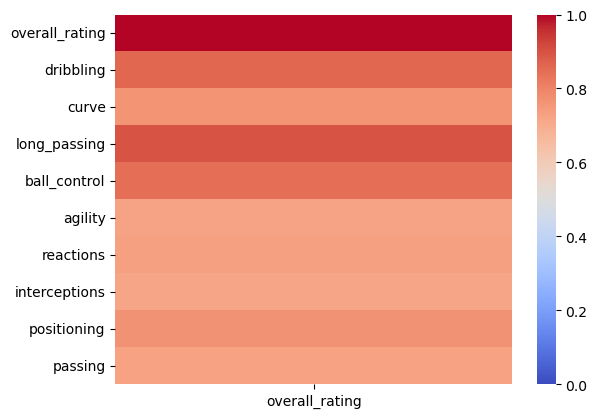

In [61]:
sns.heatmap(lwb_attributes[['overall_rating']][lwb_attributes['overall_rating'] > 0.7], vmin = 0, cmap = 'coolwarm')

plt.show()

In [62]:
rwb_attributes = best_player_attribute[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][best_player_attribute['best_position']== 'RWB'].corr()
rwb_attributes[['overall_rating']][rwb_attributes['overall_rating'] > 0.7]

,overall_rating
overall_rating,1.000000
dribbling,0.879049
ball_control,0.869657
acceleration,0.757490
sprint_speed,0.944177
agility,0.897088
shot_power,0.705497
long_shots,0.773574
interceptions,0.826234
total_defending,0.807023


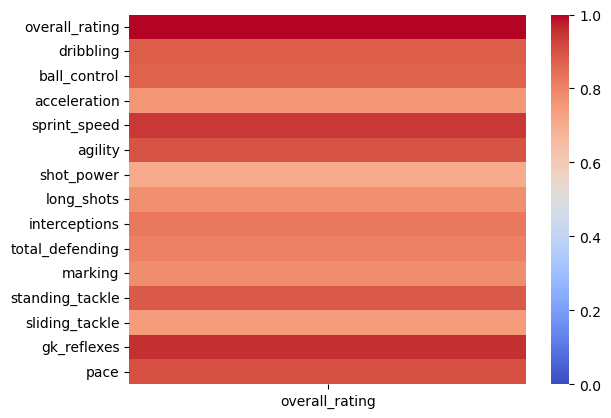

In [63]:
sns.heatmap(rwb_attributes[['overall_rating']][rwb_attributes['overall_rating'] > 0.7], vmin = 0, cmap = 'coolwarm')

plt.show()

In [64]:
lb_attributes = best_player_attribute[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][best_player_attribute['best_position']== 'LB'].corr()
lb_attributes[['overall_rating']][lb_attributes['overall_rating'] > 0.6]

,overall_rating
overall_rating,1.000000
crossing,0.671817
short_passing,0.690399
reactions,0.743433
passing,0.612745


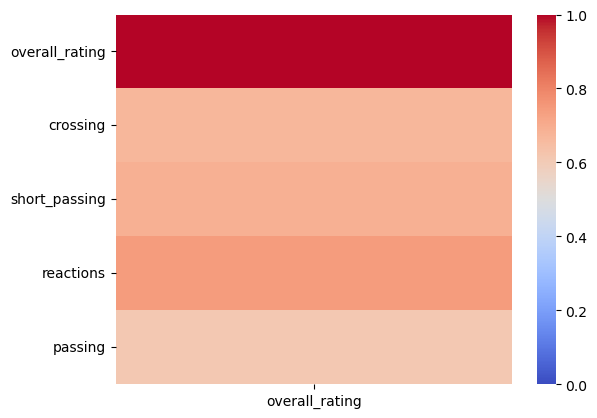

In [65]:
sns.heatmap(lb_attributes[['overall_rating']][lb_attributes['overall_rating'] > 0.6], vmin = 0, cmap = 'coolwarm')

plt.show()

In [66]:
rb_attributes = best_player_attribute[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][best_player_attribute['best_position']== 'RB'].corr()
rb_attributes[['overall_rating']][rb_attributes['overall_rating'] > 0.6]

,overall_rating
overall_rating,1.000000
short_passing,0.636511
ball_control,0.657602
reactions,0.788168
interceptions,0.681699
standing_tackle,0.638059
passing,0.632053


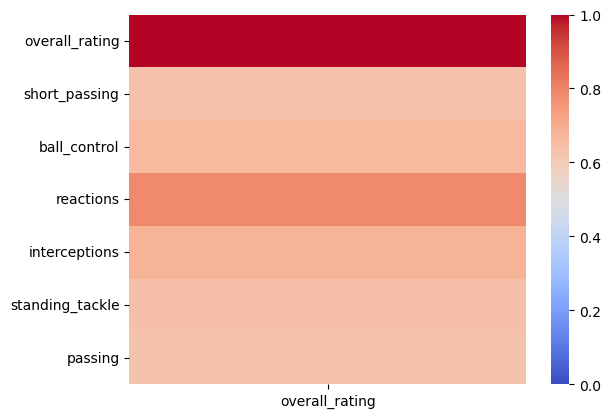

In [67]:
sns.heatmap(rb_attributes[['overall_rating']][rb_attributes['overall_rating'] > 0.6], vmin = 0, cmap = 'coolwarm')

plt.show()

In [68]:
cb_attributes = best_player_attribute[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][best_player_attribute['best_position']== 'CB'].corr()
cb_attributes[['overall_rating']][cb_attributes['overall_rating'] > 0.7]

,overall_rating
overall_rating,1.000000
reactions,0.701438
interceptions,0.712645
total_defending,0.878627
marking,0.788814
standing_tackle,0.825734


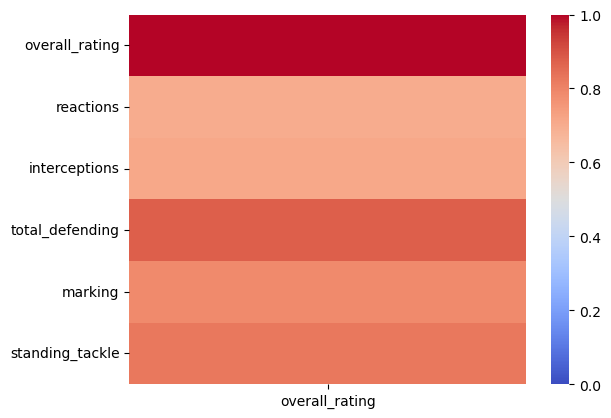

In [69]:
sns.heatmap(cb_attributes[['overall_rating']][cb_attributes['overall_rating'] > 0.7], vmin = 0, cmap = 'coolwarm')

plt.show()

In [70]:
gk_attributes = best_player_attribute[['overall_rating', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'freekick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'composure', 'total_defending', 'marking', 'standing_tackle', 'sliding_tackle', 'diving','handling', 'kicking', 'gk_positioning', 'gk_reflexes', 'pace', 'shooting', 'passing']][best_player_attribute['best_position']== 'GK'].corr()
gk_attributes[['overall_rating']][gk_attributes['overall_rating'] > 0.7]

,overall_rating
overall_rating,1.000000
reactions,0.747134
diving,0.723436
handling,0.752336
gk_positioning,0.726632
gk_reflexes,0.720872
pace,0.723436
shooting,0.752336


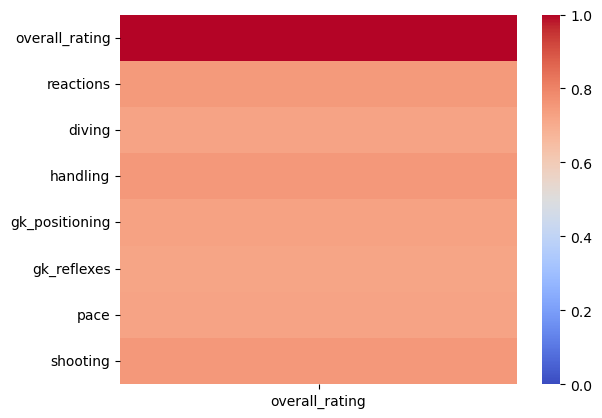

In [71]:
sns.heatmap(gk_attributes[['overall_rating']][gk_attributes['overall_rating'] > 0.7], vmin = 0, cmap = 'coolwarm')

plt.show()